 ## Домашнее задание Проверка гипотез

<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Возьмем базу данных для анализа
df = pd.read_csv('salary_dataset.csv', index_col=0)
df.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 471.4+ KB


In [6]:
df = df.dropna().reset_index(drop = True)

In [7]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


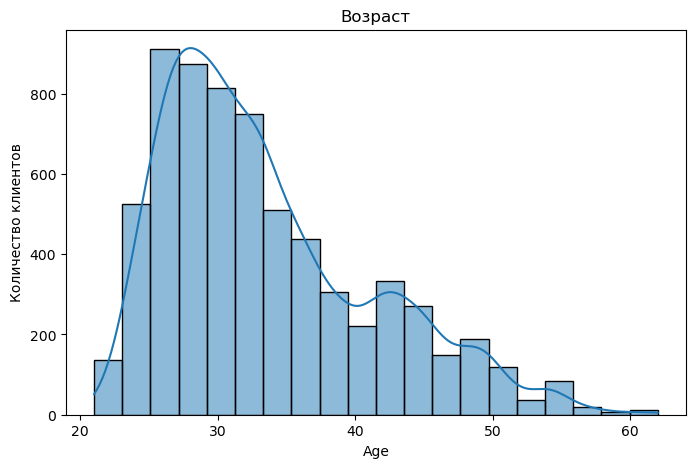

In [15]:
# Для начала проанализируем данные по возрасту на графике
plt.figure(figsize=[8, 5])
sns.histplot(data=df, x="Age", bins=20, kde=True)
plt.title("Возраст")
plt.ylabel("Количество клиентов")
plt.show()

Cогласно графику, видим не нормальное распределение.
Подтвердим это двумя способами с помощью функции.

#### Для проверки нормальности распределения выборки данных, можно воспользоваться двумя критериями: критерий Шапиро-Уилк и критерий согласия Пирсона

In [11]:
df_test = df['Age'].values
df_test

array([32., 28., 45., ..., 30., 46., 26.])

Шапиро-Уилк возвращает значение вычисленной статистики и p-значение. В качестве критического значения возьмем 0.05. При p-значении меньше 0.05 мы вынуждены отклонить нулевую гипотезу.

In [12]:
def check_normality(data):
    stat, p = st.shapiro(data)
    print(f'stat = {stat:.3f}, p = {p:.5f}')
    if p < 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")
        
check_normality(df_test)

stat = 0.926, p = 0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


/Users/annamarkina/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Второй тест по критерию согласия Пирсона.

In [13]:
def check_normality(data):
    stat, p = st.normaltest(data)
    print(f'stat = {stat:.3f}, p = {p:.5f}')
    if p < 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")
        
check_normality(df['Age'])

stat = 690.402, p = 0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


#### Вывод: Согласно двум критериям, данные распределены не нормально, что подтверждает вывод согласно визуализации.

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [3]:
np.random.seed(42) #фиксация случайности

mens  = st.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

In [4]:
mens.mean()

171.01834593701406

In [5]:
womens.mean()

169.98458452269782

In [9]:
# Используем критерий Уэлча для проверки двухвыборочных гипотез
stat, p = st.ttest_ind(mens, womens, equal_var=False)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.001:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 28.31364, p = 0.00000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Text(0.5, 1.0, 'Density Histogram')

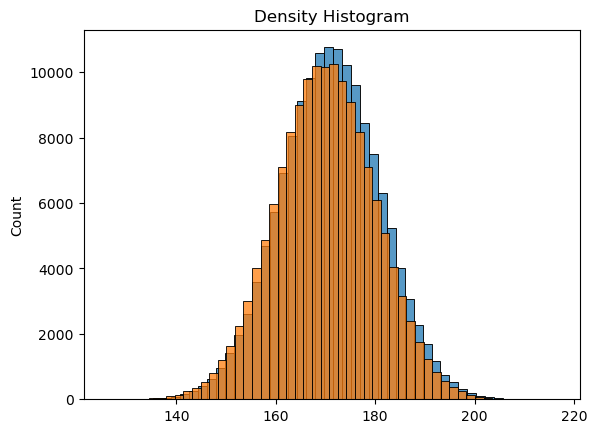

In [10]:
sns.histplot(mens, bins=50)
sns.histplot(womens, bins=50)
plt.title("Density Histogram")

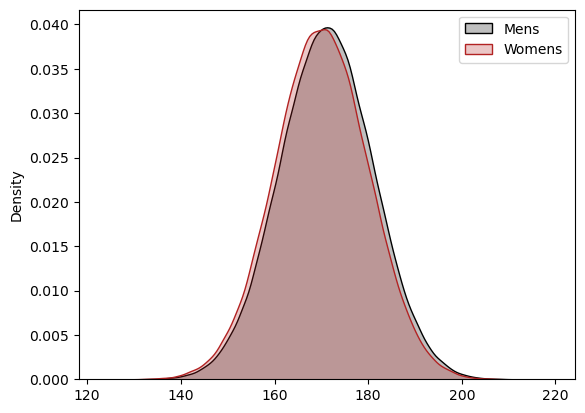

In [11]:
sns.kdeplot(mens, label="Mens", fill = True, color = '#000000')
sns.kdeplot(womens, label="Womens", fill = True, color = '#B22222')
plt.legend()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x15dbaa740>,
 'caps': [<matplotlib.lines.Line2D at 0x15dbaac80>,
 'boxes': [<matplotlib.lines.Line2D at 0x15dbaa4a0>],
 'medians': [<matplotlib.lines.Line2D at 0x15dbab1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15dbab460>],
 'means': []}

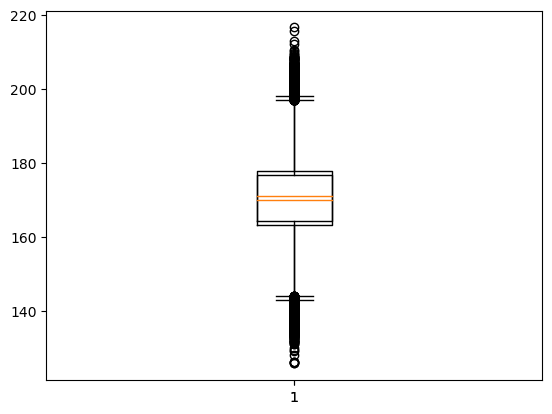

In [12]:
plt.boxplot(mens)
plt.boxplot(womens)

#### Вывод: Результат согласно тесту не информативен. 

#### p ≈ 0 означает, что вероятность случайного получения таких данных при верной нулевой гипотезе крайне мала. Это говорит о статистически значимом различии между выборками.

#### Результат t-теста в данном случае не является полезным с практической точки зрения. Разница в средних незначительная - 1 см, однако в виду большого объема выборки тест становится гиперчувствительным и эта крайне малая с практической точки зрения разница становится статистически значимой. 

<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [30]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

In [35]:
import statistics
print(f'{statistics.mean(developer_team)}, {statistics.mean(test_team)}')

3.776470588235294, 4.264705882352941


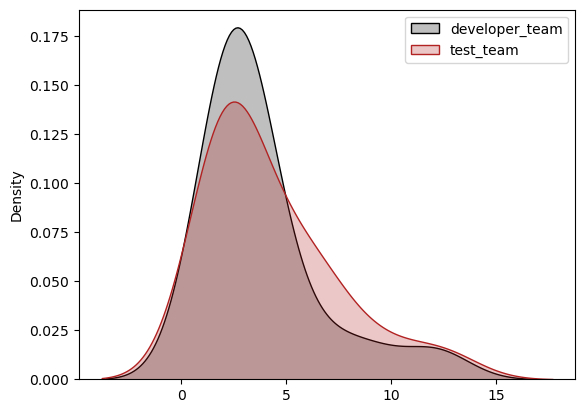

In [27]:
sns.kdeplot(developer_team, label="developer_team", fill = True, color = '#000000')
sns.kdeplot(test_team, label="test_team", fill = True, color = '#B22222')
plt.legend()
plt.show()

In [24]:
stat, p = st.shapiro(developer_team)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно, распределение нормальное')
else:
    print('Вероятно, распределение не нормальное')

stat = 0.753, p = 0.00049
Вероятно, распределение не нормальное


In [25]:
stat, p = st.shapiro(test_team)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно, распределение нормальное')
else:
    print('Вероятно, распределение не нормальное')

stat = 0.825, p = 0.00462
Вероятно, распределение не нормальное


Так как распределение не нормальное, будем использовать критерий Манна-Уитни.

In [26]:
stat, p = st.mannwhitneyu(developer_team, test_team)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 137.50000, p = 0.82265
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


#### Вывод: Тест не показал наличие статистически значимой разницы между сверхурочной работой двух команд - при текущих показателях и размерности данных мы не можем отвергуть гипотезу и утверждать, что одна из команд переутомляется больше.

<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [13]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

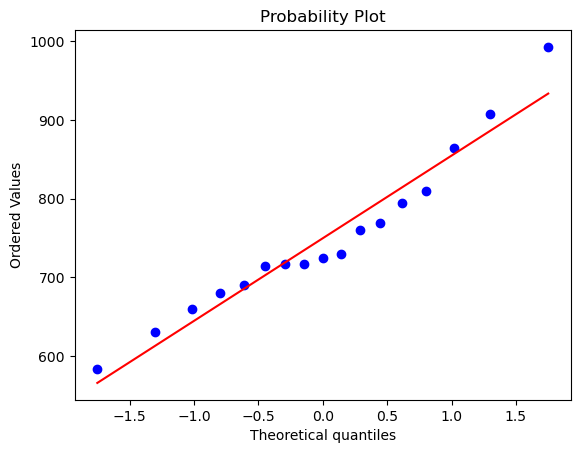

In [14]:
df_only_breast = st.probplot(only_breast, plot=plt)

In [15]:
stat, p = st.shapiro(only_breast)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Вероятно, нормальное распределение')
else:
    print('Вероятно, не нормальное распределение')

Статистика = 0.95081, p = 0.46942
Вероятно, нормальное распределение


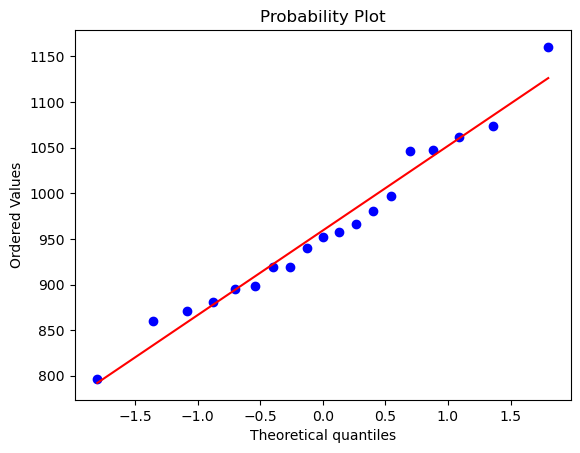

In [16]:
df_only_formula = st.probplot(only_formula, plot=plt)

In [17]:
stat, p = st.shapiro(only_formula)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Вероятно, нормальное распределение')
else:
    print('Вероятно, не нормальное распределение')

Статистика = 0.97608, p = 0.88790
Вероятно, нормальное распределение


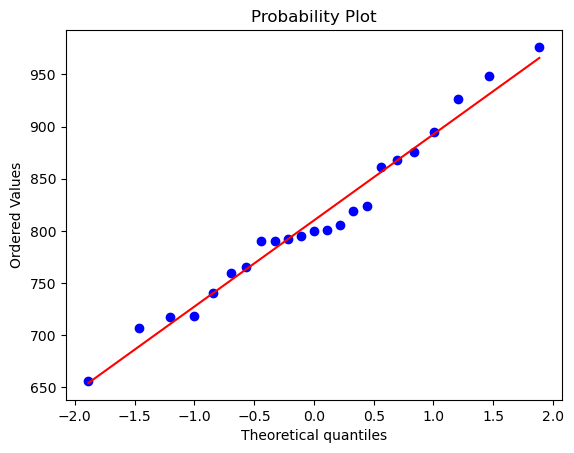

In [18]:
df_both = st.probplot(both, plot=plt)

In [19]:
stat, p = st.shapiro(both)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Вероятно, нормальное распределение')
else:
    print('Вероятно, не нормальное распределение')

Статистика = 0.97461, p = 0.79730
Вероятно, нормальное распределение


In [20]:
import statistics
print(f'{statistics.mean(only_breast)}, {statistics.mean(only_formula)}, {statistics.mean(both)}')

749.8235294117648, 959.2157894736843, 809.9521739130435


{'whiskers': [<matplotlib.lines.Line2D at 0x15d82dea0>,
 'caps': [<matplotlib.lines.Line2D at 0x15d82e3e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d82dc00>],
 'medians': [<matplotlib.lines.Line2D at 0x15d82e920>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d82ebc0>],
 'means': []}

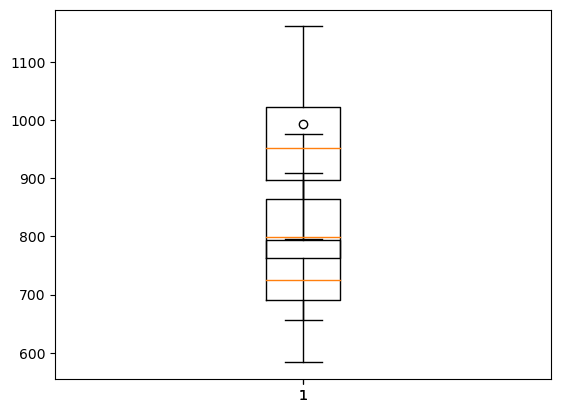

In [21]:
plt.boxplot(only_breast)
plt.boxplot(only_formula)
plt.boxplot(both)

Прежде чем переходить к дисперсионному анализу, проверим равенство вариаций.

In [24]:
stat, p = st.levene(only_breast,only_formula,both)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p <0.05:
    print("Отклоняем нулевую гипотезу >> Вариация в группах различается")
else:
    print("Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая")

Статистика = 0.26612, p = 0.76731
Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая


Теперь используем однофакторный дисперсионный анализ.

In [25]:
fvalue, pvalue = st.f_oneway(only_breast,only_formula,both)

print(f"Статистика = {fvalue:.5f}, p = {pvalue:.5f}")

if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 26.70125, p = 0.00000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Сравним выборки с помощью теста Тьюки

In [35]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

In [63]:
df1 = pd.DataFrame(only_breast, columns=['values'])
df1['formula'] = 'only_breast'
df2 = pd.DataFrame(only_formula, columns=['values'])
df2['formula'] = 'only_formula'
df3 = pd.DataFrame(both, columns=['values'])
df3['formula'] = 'both'
df = pd.concat([df1, df2, df3], axis=0)

In [64]:
df.head(2)

,values,formula
0,794.1,only_breast
1,716.9,only_breast


In [65]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['values'].values,
                          groups=df['formula'],
                          alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower    upper   reject
------------------------------------------------------------------
       both  only_breast -60.1286 0.0995 -129.1485   8.8912  False
       both only_formula 149.2636    0.0   82.3651 216.1621   True
only_breast only_formula 209.3923    0.0  137.3508 281.4337   True
------------------------------------------------------------------


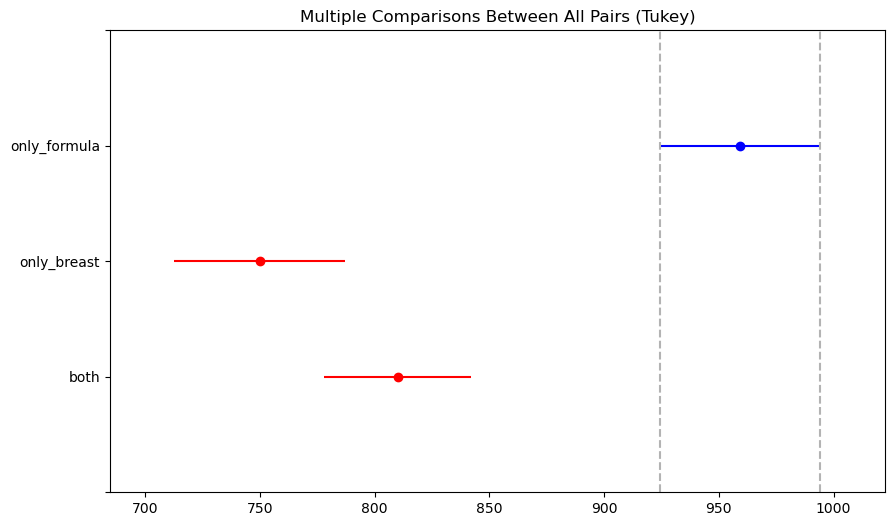

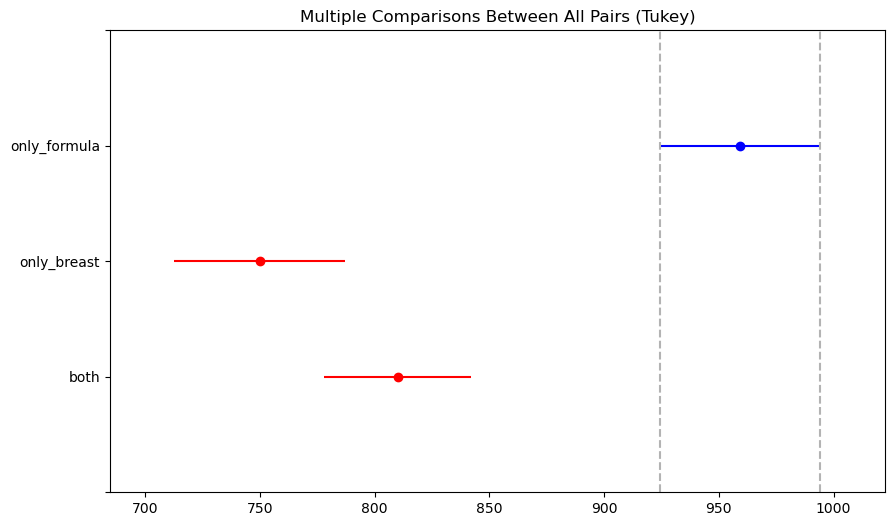

In [66]:
tukey.plot_simultaneous(comparison_name="only_formula")

#### Вывод: Результат согласно анализу указывает на различие в среднемесячной прибавке в весе у новорожденных в зависимости от способа кормления. Согласно результатам Тьюки подтверждаем статистически значимые различия между группами: both - only_formula, only_breast и only_formula.

<div class="alert alert-info">
<b>Задание № 5 (Опционально) </b>

Аналитик финансовой инвестиционной компании интересуется взаимосвязью между полом и склонностью к риску. Из базы данных была взята случайная выборка из 660 клиентов. Клиенты в выборке были классифицированы в соответствии с их полом и склонностью к риску. Результат приведен в следующей таблице.
    
Проверьте гипотезу о том, что склонность к риску клиентов этой компании не зависит от их пола. Используйте α = 0.01.    
</div>

In [77]:
contingency_table = pd.DataFrame(
    [
        [53, 23, 30, 36, 88],
        [71, 48, 51, 57, 203]
    ],
    #columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['Ж', 'М'])

print('Уровень риска')
print(contingency_table)

Уровень риска
    0   1   2   3    4
Ж  53  23  30  36   88
М  71  48  51  57  203


In [76]:
contingency_table.index.name = 'Пол'
df = contingency_table.stack()
df_ = df.to_frame()
df_control = df_.reset_index()
df_control.columns = ['Пол', 'Группа', 'Количество_клиентов']
#df_control.groupby('Пол')['Количество_клиентов'].sum()

Используем Критерий Пирсона (хи квадрат)

In [79]:
# chi2 : Посчитанная статистика теста
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы
chi, pval, dof, exp = st.chi2_contingency(contingency_table.values) 
significance = 0.01

#Нулевая гипотеза - склонность к риску клиентов этой компании не зависит от их пола
print(f"p-value = {pval:.6f}, уровень значимости = {significance:.2f}")

print(pval)
if pval < significance:
    print(f"На уровене значимости {significance:.2f}, мы отвергаем нулевые гипотезы и принимаем H1.")
    print('Cклонность к риску зависит от пола!')
else:
    print(f"На уровене значимости {significance:.2f}, мы не отвергаем нулевые гипотезы. Cклонность к риску, вероятно, не зависит от их пола.")

p-value = 0.130992, уровень значимости = 0.01
0.13099220858734012
На уровене значимости 0.01, мы не отвергаем нулевые гипотезы. Cклонность к риску, вероятно, не зависит от их пола.


<div class="alert alert-info">
<b>Задание № 6 (Опционально)</b>

Компания электронной коммерции регулярно размещает рекламу своих кампаний на YouTube, Instagram и Facebook. Однако новому менеджеру было любопытно, есть ли разница между количеством клиентов, привлеченных этими платформами. Поэтому она начала использовать Adjust — приложение, позволяющее узнать, откуда приходят ваши пользователи. Ежедневные цифры, сообщаемые Adjust для каждой платформы, приведены ниже.
    
В соответствии с этой информацией проведите проверку гипотез, чтобы проверить, есть ли разница между средним числом привлеченных клиентов на этих трех платформах с использованием уровня значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы. Прежде чем приступать к проверке гипотез, проверьте соответствующие предположения.
</div>

In [80]:
youtube=[1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125]
instagram = [2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.]
facebook = [2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.]

In [81]:
import statistics
print(f'youtube-{statistics.mean(youtube):.0f}, instagram-{statistics.mean(instagram):.0f}, facebook-{statistics.mean(facebook):.0f}')

youtube-2044, instagram-2308, facebook-2295


<Axes: >

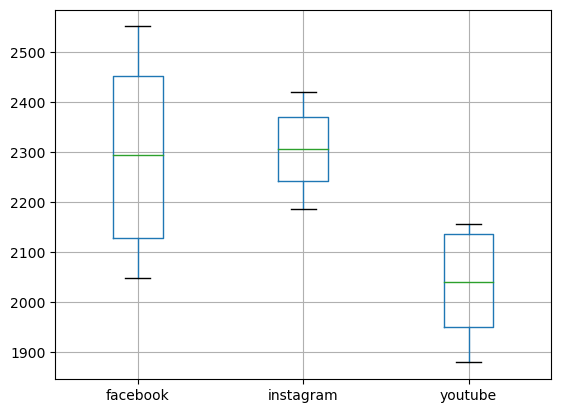

In [85]:
data =\
    pd.DataFrame({
        'facebook': facebook,
        'instagram': instagram,
        'youtube': youtube
    })
data.boxplot() 

In [88]:
# Проверим распределение - нормальное распределение по данным facebook-источника 
stat, p = st.shapiro(facebook)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Вероятно, нормальное распределение')
else:
    print('Вероятно, не нормальное распределение')

Статистика = 0.91671, p = 0.17158
Вероятно, нормальное распределение


In [89]:
# Проверим распределение - нормальное распределение по данным instagram-источника 
stat, p = st.shapiro(instagram)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Вероятно, нормальное распределение')
else:
    print('Вероятно, не нормальное распределение')

Статистика = 0.94255, p = 0.41558
Вероятно, нормальное распределение


In [90]:
# Проверим распределение - не нормальное распределение по данным youtube-источника 
stat, p = st.shapiro(youtube)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Вероятно, нормальное распределение')
else:
    print('Вероятно, не нормальное распределение')

Статистика = 0.86503, p = 0.02854
Вероятно, не нормальное распределение


In [87]:
# Так как в группе есть источник с распределением отличным от нормального
# Проведем анализ согласно критерию Краскела-Уоллиса

fvalue, pvalue = st.kruskal(facebook,instagram,youtube)

print(f"Статистика = {fvalue:.5f}, p = {pvalue:.5f}")

if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 22.19354, p = 0.00002
Отклоняем нулевую гипотезу, средние, вероятно, различаются


 #### Вывод: согласно анализу подтверждаем различие между средним числом привлеченных клиентов, наибольшие показатели у источников: instagram, facebook.

# **Примечание:**

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

*   файлы;
*   архивы;
*   скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1.   Что я делаю?
2.   Какого результата я ожидаю?
3.   Как фактический результат отличается от ожидаемого?
4.   Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.